# The active wokspace

In [1]:
from maelzel.core import *

There is always an active Workspace. When maelzel.core is imported a new Workspace is created. `getWorkspace` returns the active  Workspace

In [8]:
w = getWorkspace()
w

Workspace(scorestruct=ScoreStruct(tempo=60, timesig=(4, 4)), config={'A4': 443, 'show.horizontalSpacing': 'default', 'play.instr': '_piano', 'play.schedLatency': 0.08}, dynamicCurve=DynamicCurve(shape=expon(0.3), mindb=-60.0, maxdb=0.0))

Alternatively the active workspace can be accessed via the `active` class variable, as `Workspace.active`

In [9]:
w is Workspace.active

True

The active workspace contains the working environment. The most important attributes encapsulated here are the score structure (`.scorestruct`) and the core configuration (`.config`)  


Each new `Workspace` contains a basic `ScoreStruct` (4/4, quarter=60) and a copy of the root config

In [6]:
w.scorestruct

Meas. Index,Timesig,Tempo (quarter note),Label,Rehearsal,Barline
0,4/4,60,,,
...,,,,,


In [7]:
w.config

Key,Value,Type,Descr
A4,443,between 10 - 10000 | default: 442,"Freq. of the Kammerton A4. Normal values are 440, 442, 443 or 432 for old tuning, but any 'fantasy' value can be used"
splitAcceptableDeviation,4,type: int,"When splitting notes between staves, notes within this range of the split point will be grouped together if they all fit"
chordAdjustGain,True,type: bool,"Adjust the gain of a chord according to the number of notes, to prevent clipping"
reprShowFreq,False,type: bool,Show frequency when printing a Note in the console
semitoneDivisions,4,"{1, 2, 4}","The number of divisions per semitone (2=quarter-tones, 4=eighth-tones)"
musescorepath,,type: str,The command to use when calling MuseScore. For macOS users: it must be an absolute path pointing to the actual binary inside the .app bundle
reprShowFractionsAsFloat,True,type: bool,"All time offsets and durations are kept as rational numbers to avoid rounding errors. If this option is True, these fractions are printed as floats in order to make them more readable."
fixStringNotenames,False,type: bool,"If True, pitches given as string notenames are fixed at the spelling given at creation. Otherwise pitches might be respelled to match their context for better readability. Pitches given as midi notes or frequencies are always respelled"
openImagesInExternalApp,False,type: bool,"Force opening images with an external tool, even when inside a Jupyter notebook"
enharmonicSpellingHorizontalWeight,1,type: int,The weight of the horizontal dimension (note sequences) when evaluating an enharmonic variant


## Modifying the active Workspace vs creating a new Workspace

If you are not planning on working on multiple scores simultaneously, the most convenient way to setup your own score structure or to customize the configuration is to **modify the active workspace**. For example, the score structure can be set via `setScoreStruct`


Chain([4C:0.5♩, 4D:2♩, 4E:1♩])
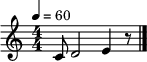

In [10]:
# Reset the scorestruct to the default
setScoreStruct()

chain = Chain(r"""
    4C:0.5
    4D:2
    4E:1
""")
chain.play()
chain

Chain([4C:0.5♩, 4D:2♩, 4E:1♩])
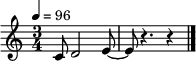

In [11]:
setScoreStruct(timesig=(3, 4), tempo=96)
chain.play()
chain

Or you can create an independent Workspace with its own scorestruct:

Chain([4C:0.5♩, 4D:2♩, 4E:1♩])
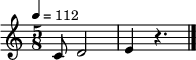

In [18]:
w = Workspace(scorestruct=ScoreStruct(timesig=(5, 8), tempo=112), active=True)
chain

Deactivating the active Workspace activates the previous workspace (there should always be an active Workspace)

Chain([4C:0.5♩, 4D:2♩, 4E:1♩])
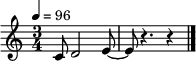

In [19]:
w.deactivate()
chain

As a side note, if you just want to test something under a different scorestruct, you can do use a `ScoreStruct` as a **context manager**. This clones the active Workspace with the given `ScoreStruct` and activates this newly created Workspace, to deactivate it when to context is exited.

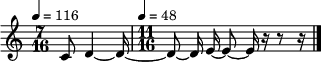

In [21]:
with ScoreStruct(r'''
    7/16, 116
    11/16, 48
'''):
    chain.play()
    chain.show()

The same is valid for the configuration. You can modify the active Workspace by changing its config, either via `setConfig` or by directly assigning to `.config`:

4C+15:1♩
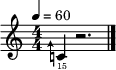

In [3]:
Note("+15", 1)

Chain([4C+15:1♩, 4Eb-19:0.5♩, 3B+:1.5♩])
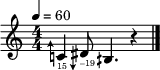

In [4]:
setScoreStruct()

chain = Chain(r'''
  C4+15:1
  4Eb-19:0.5
  3B+:1.5
''')
chain

Chain([4C+15:1♩, 4Eb-19:0.5♩, 3B+:1.5♩])
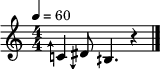

In [6]:
config = CoreConfig()
config['show.centsDeviationAsTextAnnotation'] = False

setConfig(config)
chain

Reset the config to the root config

Chain([4C+15:1♩, 4Eb-19:0.5♩, 3B+:1.5♩])
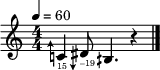

In [7]:
setConfig(rootConfig)
chain